<a href="https://colab.research.google.com/github/imazerty/1project/blob/master/tp_week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/suraggupta/coursera-machine-learning-solutions-python

Cloning into 'coursera-machine-learning-solutions-python'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 160 (delta 2), reused 0 (delta 0), pack-reused 154
Receiving objects: 100% (160/160), 22.34 MiB | 8.67 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [0]:
import os
import matplotlib.pyplot as plt
import utils 
from scipy.io import loadmat
from scipy.optimize import minimize
import numpy as np
%matplotlib inline
grader = utils.Grader()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


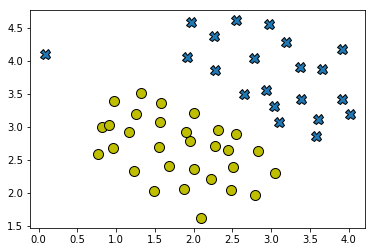

In [3]:
data = loadmat(os.path.join('coursera-machine-learning-solutions-python','Exercise6', 'Data', 'ex6data1.mat'))
print(data.keys())
X,y = data['X'], data['y'].ravel()

# Plot training data
utils.plotData(X, y)

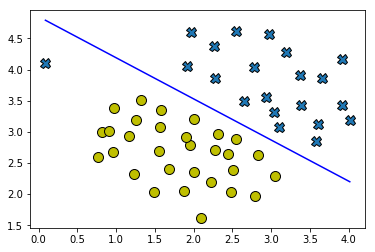

In [4]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1

model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

In [0]:
def gaussianKernel(x1, x2, sigma):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x1 and x2.
    
    Parameters
    ----------
    x1 :  numpy ndarray
        A vector of size (n, ), representing the first datapoint.
    
    x2 : numpy ndarray
        A vector of size (n, ), representing the second datapoint.
    
    sigma : float
        The bandwidth parameter for the Gaussian kernel.

    Returns
    -------
    sim : float
        The computed RBF between the two provided data points.
    
    Instructions
    ------------
    Fill in this function to return the similarity between `x1` and `x2`
    computed using a Gaussian kernel with bandwidth `sigma`.
    """
    sim = 0
    # ====================== YOUR CODE HERE ======================
    sim = np.exp(-np.sum(np.square(x1 - x2))/(2*sigma**2))
    
    return sim
  

In [6]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



In [7]:
grader[1] = gaussianKernel
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Login (email address): imen.haddad@supcom.tn
Token: 1fHejZtV1IjPbkaa
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |   0 /  25 | 
                           Email Processing |   0 /  25 | 
                   Email Feature Extraction |   0 /  25 | 
                                  --------------------------------
                                            |  25 / 100 |  



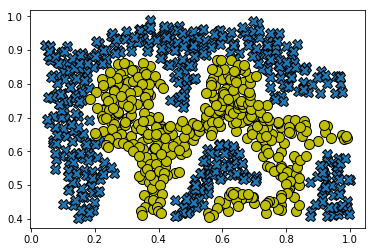

In [8]:

# Load from ex6data2
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('coursera-machine-learning-solutions-python','Exercise6', 'Data', 'ex6data2.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

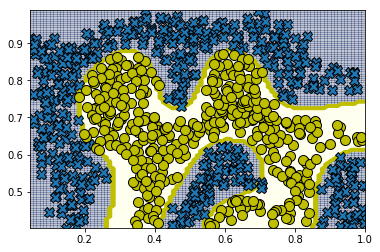

In [9]:
# SVM Parameters
C = 1
sigma = 0.1

model= utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)

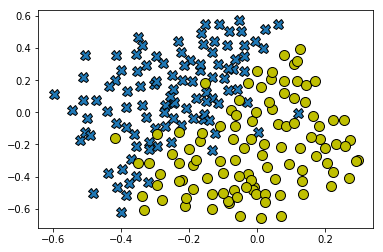

In [10]:
# Load from ex6data3
# You will have X, y, Xval, yval as keys in the dict data
data = loadmat(os.path.join('coursera-machine-learning-solutions-python','Exercise6','Data', 'ex6data3.mat'))
X, y, Xval, yval = data['X'], data['y'][:, 0], data['Xval'], data['yval'][:, 0]

# Plot training data
utils.plotData(X, y)

In [0]:
def dataset3Params(X, y, Xval, yval):
    """
    Returns your choice of C and sigma for Part 3 of the exercise 
    where you select the optimal (C, sigma) learning parameters to use for SVM
    with RBF kernel.
    
    Parameters
    ----------
    X : array_like
        (m x n) matrix of training data where m is number of training examples, and 
        n is the number of features.
    
    y : array_like
        (m, ) vector of labels for ther training data.
    
    Xval : array_like
        (mv x n) matrix of validation data where mv is the number of validation examples
        and n is the number of features
    
    yval : array_like
        (mv, ) vector of labels for the validation data.
    
    Returns
    -------
    C, sigma : float, float
        The best performing values for the regularization parameter C and 
        RBF parameter sigma.
    
    Instructions
    ------------
    Fill in this function to return the optimal C and sigma learning 
    parameters found using the cross validation set.
    You can use `svmPredict` to predict the labels on the cross
    validation set. For example, 
    
        predictions = svmPredict(model, Xval)

    will return the predictions on the cross validation set.
    
    Note
    ----
    You can compute the prediction error using 
    
        np.mean(predictions != yval)
    """
    # You need to return the following variables correctly.
    C = 1
    sigma = 0.3
    
    

    # ====================== YOUR CODE HERE ======================
    C_array = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    sigma_array = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    
    err_array = np.zeros((C_array.size,sigma_array.size))
    for i in np.arange(C_array.size):
      for j in np.arange(sigma_array.size):
        model = utils.svmTrain(X, y, C_array[i], gaussianKernel, args=(sigma_array[j],))
        predictions = utils.svmPredict(model, Xval) 
        err_array[i,j] = np.mean(yval != predictions)
        
      
    index_C, index_sigma =  np.unravel_index(err_array.argmin(), err_array.shape)
    C_opt = C_array[index_C]
    sigma_opt = sigma_array[index_sigma]
    return C_opt, sigma_opt
  

1.0 0.1


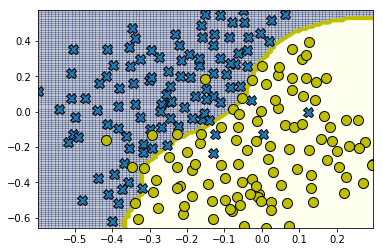

In [12]:
# Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xval, yval)

# Train the SVM
# model = utils.svmTrain(X, y, C, lambda x1, x2: gaussianKernel(x1, x2, sigma))
model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)
print(C, sigma)

In [13]:
grader[2] = lambda : (C, sigma)
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (imen.haddad@supcom.tn)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
                           Email Processing |   0 /  25 | 
                   Email Feature Extraction |   0 /  25 | 
                                  --------------------------------
                                            |  50 / 100 |  



In [0]:
def processEmail(email_contents, verbose=True):
    """
    Preprocesses the body of an email and returns a list of indices 
    of the words contained in the email.    
    
    Parameters
    ----------
    email_contents : str
        A string containing one email. 
    
    verbose : bool
        If True, print the resulting email after processing.
    
    Returns
    -------
    word_indices : list
        A list of integers containing the index of each word in the 
        email which is also present in the vocabulary.
    
    Instructions
    ------------
    Fill in this function to add the index of word to word_indices 
    if it is in the vocabulary. At this point of the code, you have 
    a stemmed word from the email in the variable word.
    You should look up word in the vocabulary list (vocabList). 
    If a match exists, you should add the index of the word to the word_indices
    list. Concretely, if word = 'action', then you should
    look up the vocabulary list to find where in vocabList
    'action' appears. For example, if vocabList[18] =
    'action', then, you should add 18 to the word_indices 
    vector (e.g., word_indices.append(18)).
    
    Notes
    -----
    - vocabList[idx] returns a the word with index idx in the vocabulary list.
    
    - vocabList.index(word) return index of word `word` in the vocabulary list.
      (A ValueError exception is raised if the word does not exist.)
    """
    # Load Vocabulary
    vocabList = utils.getVocabList()

    # Init return value
    word_indices = []

    # ========================== Preprocess Email ===========================
    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers
    # hdrstart = email_contents.find(chr(10) + chr(10))
    # email_contents = email_contents[hdrstart:]

    # Lower case
    email_contents = email_contents.lower()
    
    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents =re.compile('<[^<>]+>').sub(' ', email_contents)

    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.compile('[0-9]+').sub(' number ', email_contents)

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.compile('(http|https)://[^\s]*').sub(' httpaddr ', email_contents)

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.compile('[^\s]+@[^\s]+').sub(' emailaddr ', email_contents)
    
    # Handle $ sign
    email_contents = re.compile('[$]+').sub(' dollar ', email_contents)
    
    # get rid of any punctuation
    email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', email_contents)

    # remove any empty word string
    email_contents = [word for word in email_contents if len(word) > 0]
    
    # Stem the email contents word by word
    stemmer = utils.PorterStemmer()
    processed_email = []
    for word in email_contents:
        # Remove any remaining non alphanumeric characters in word
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)

        if len(word) < 1:
            continue

        # Look up the word in the dictionary and add to word_indices if found
        # ====================== YOUR CODE HERE ======================

        try:
            word_indices.append(vocabList.index(word))
        except ValueError:
            pass

        # =============================================================

    if verbose:
        
        print(' '.join(processed_email))
    return word_indices

In [17]:
grader[3] = processEmail
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (imen.haddad@supcom.tn)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
                           Email Processing |  25 /  25 | Nice work!
                   Email Feature Extraction |   0 /  25 | 
                                  --------------------------------
                                            |  75 / 100 |  



In [16]:
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in processEmail.m to produce a word indices vector
#  for a given email.

# Extract Features
import utils
import re
with open(os.path.join('coursera-machine-learning-solutions-python','Exercise6','Data', 'emailSample1.txt')) as fid:
    file_contents = fid.read()
    word_indices  = processEmail(file_contents)

    #Print Stats
    
    print('Word Indices:')
    print('-------------')
    print(word_indices)
    

anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
Word Indices:
-------------
[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1894, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 476, 1119, 1892, 1509, 798, 1181, 1236, 511, 1119, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]


In [0]:
def email_features(word_indices):
    vocabList = utils.getVocabList()
    features = np.zeros(len(vocabList))
    for index in word_indices:
        features[index] = 1
    return features

In [0]:

features_1 = email_features(word_indices)

In [32]:
grader[4] = email_features
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (imen.haddad@supcom.tn)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
                           Email Processing |  25 /  25 | Nice work!
                   Email Feature Extraction |  25 /  25 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  

